In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

In [2]:
df=pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

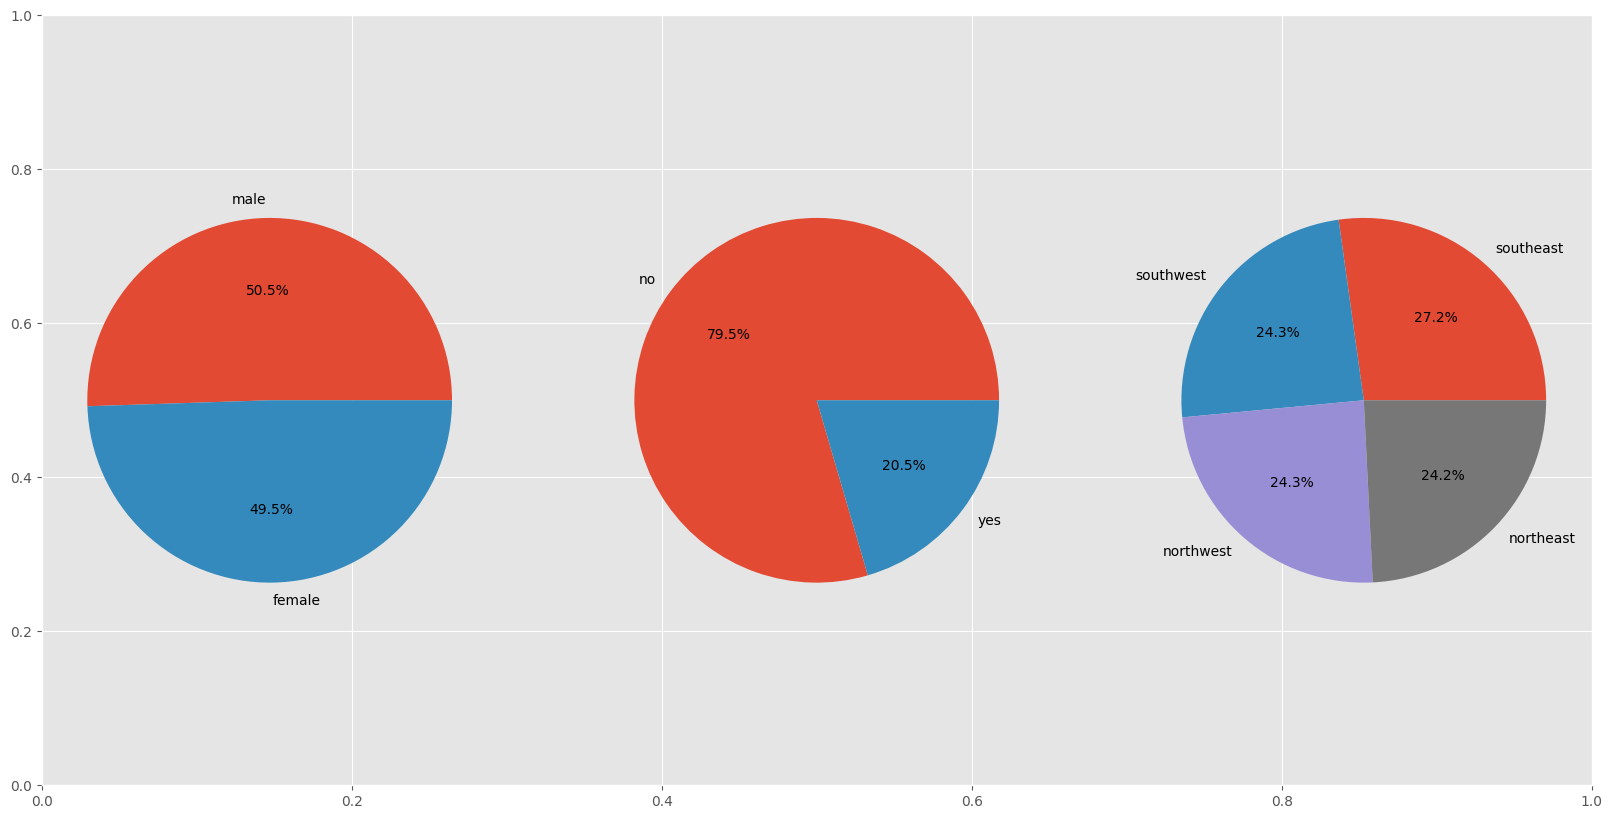

In [8]:
features=['sex','smoker','region']
plt.subplots(figsize=(20,10))

for i,col in enumerate(features):
  plt.subplot(1,3,i+1)

  x=df[col].value_counts()
  # Escape the percentage sign using %%
  plt.pie(x.values,labels=x.index,autopct="%1.1f%%")

plt.show()

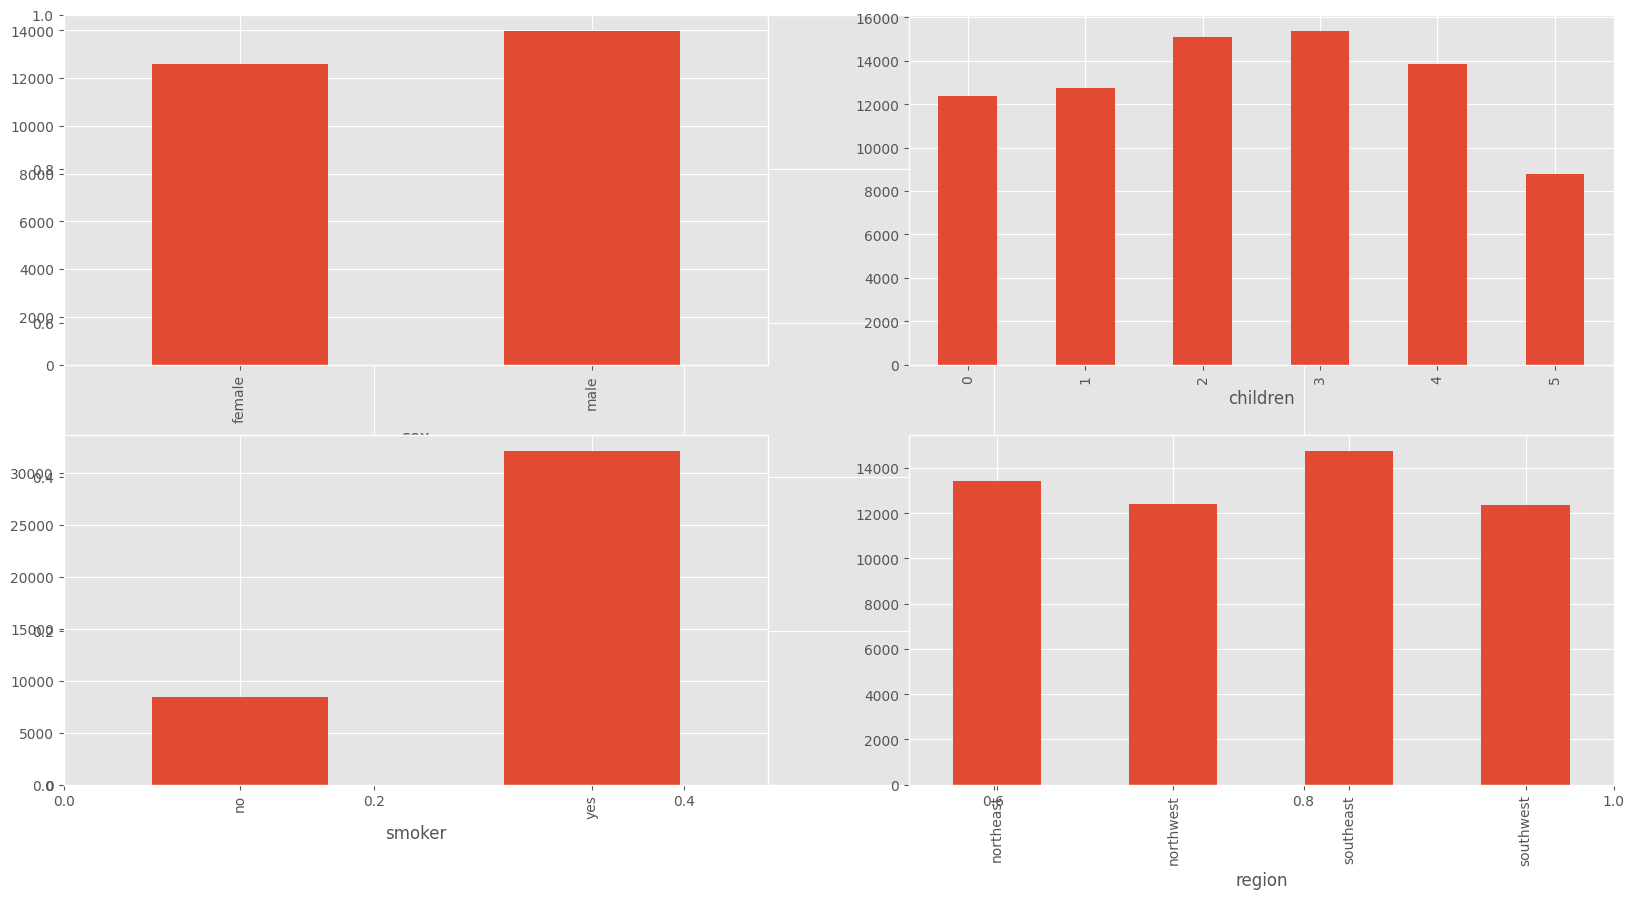

In [9]:
features=['sex','children','smoker','region']
plt.subplots(figsize=(20,10))

for i,col in enumerate(features):
  plt.subplot(2,2,i+1)
  df.groupby(col)['charges'].mean().astype(float).plot.bar()

plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

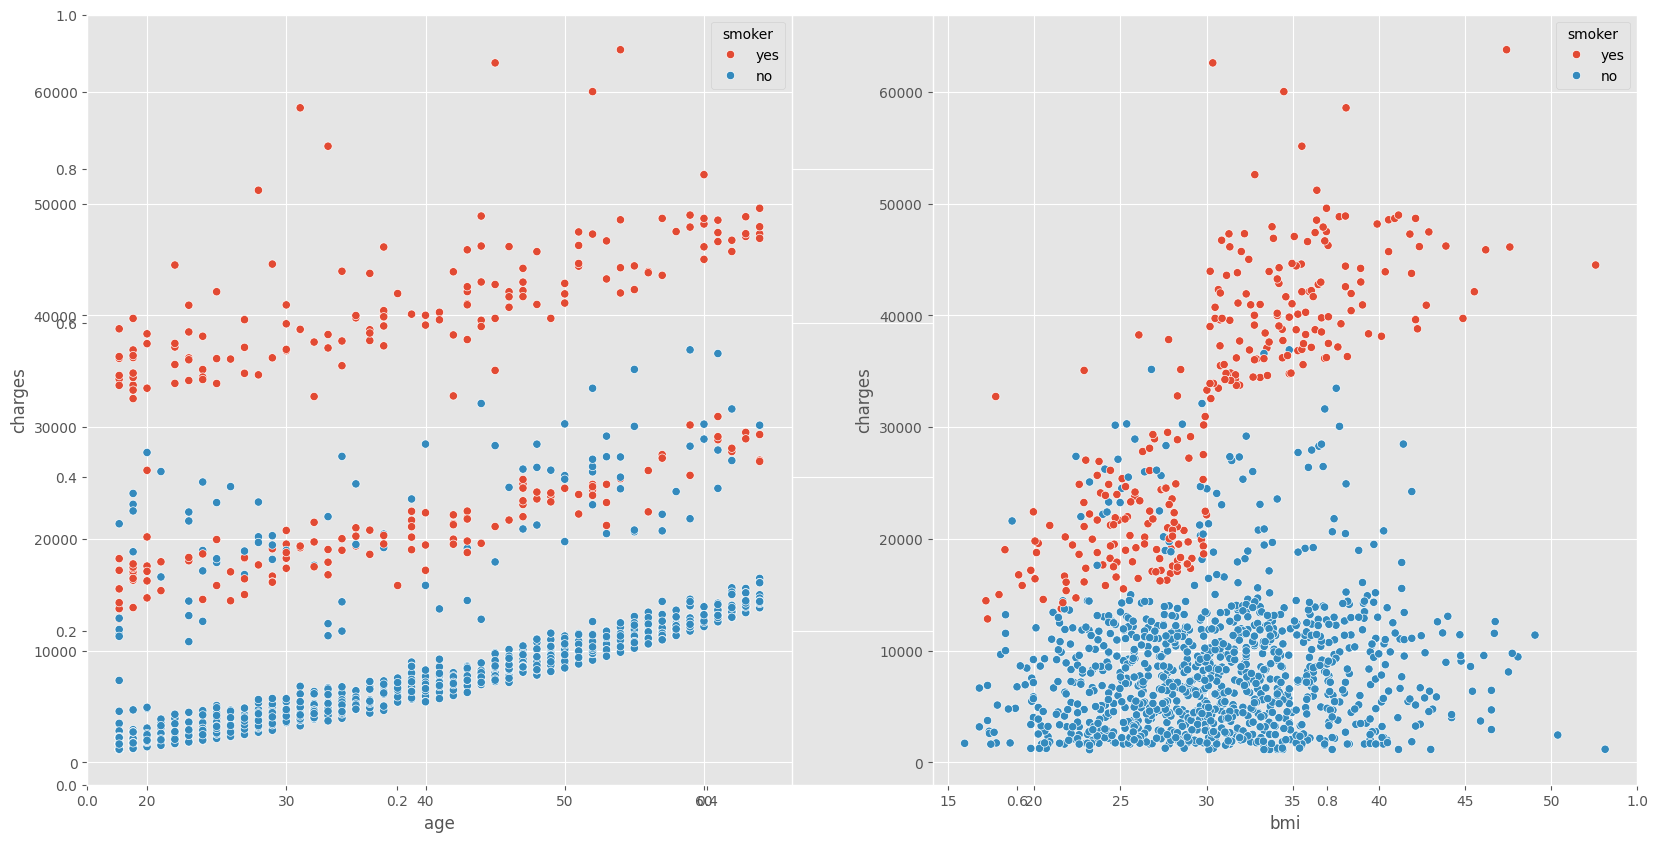

In [10]:
features=['age','bmi']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(1,2,i+1)
  sns.scatterplot(data=df, x=col, y='charges',hue='smoker')

plt.show

In [11]:
df.drop_duplicates(inplace=True)

<Axes: ylabel='age'>

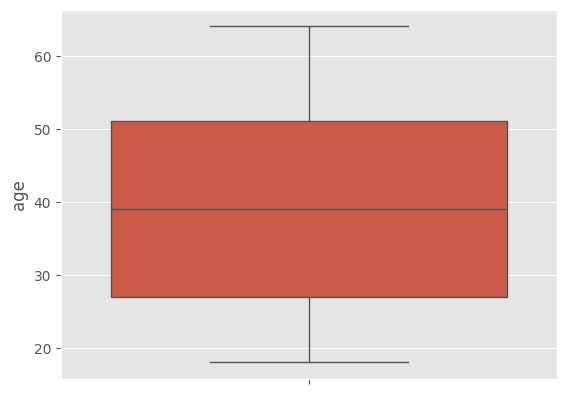

In [12]:
sns.boxplot(df['age'])

<Axes: ylabel='bmi'>

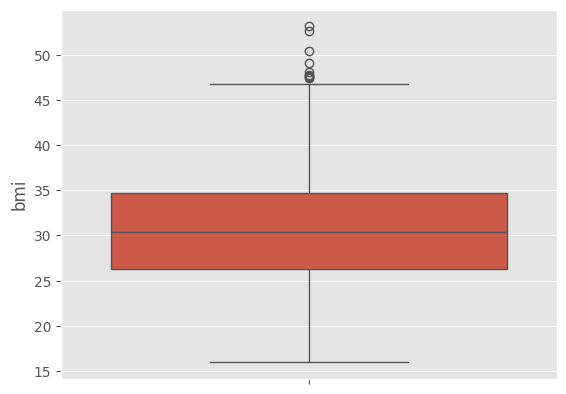

In [13]:
sns.boxplot(df['bmi'])

In [14]:
Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.50)
Q3=df['bmi'].quantile(0.75)

IQR=Q3-Q1
lower_limit=Q1 - 1.5 * IQR
upper_limit=Q3 + 1.5 * IQR
print(lower_limit)
print(upper_limit)

13.674999999999994
47.31500000000001


In [15]:
!pip install feature_engine
# after successful installation import it using following statement
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':13.674999999999994},max_capping_dict={'bmi':47.31500000000001})
df[['bmi']]=arb.fit_transform(df[['bmi']])

  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.7 MB 985.5 kB/s eta 0:00:11
   - -------------------------------------- 0.5/10.7 MB 985.5 kB/s eta 0:00:11
   -- ------------------------------------- 0.8/10.7 MB 931.2 kB/s eta 0:00:11
   --- ------------------------------------ 1.0/10.7 MB 853.0 kB/s eta 0:00:12
   ---- ----------------------------------- 1.3/10.7 MB 932.1 kB/s eta 0:00:11
   ---- ----------------------------------- 1.3/10.7 MB 932.1 kB/s eta 0:00:11
   ----- ---------------------------------- 1.6/10.7 MB 882.6 kB/s eta 0:00:11
   ------ --------------------------------- 1.8/10.7 MB 875.3 kB/s eta 0:00:11
   ------ --------------------------------- 1.8/10.7 MB 875.3 kB/s eta 0:00:11
   -------

<Axes: ylabel='bmi'>

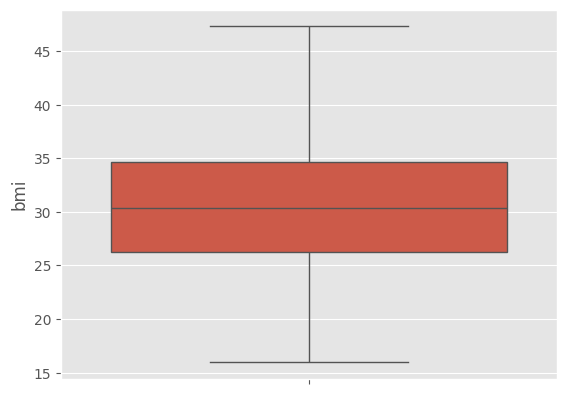

In [16]:
sns.boxplot(df['bmi'])

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
df['bmi'].skew()
df['age'].skew()

np.float64(0.054780773126998195)

In [19]:
df['sex']=df['sex'].map({'male':0,'female':1})
df['smoker']=df['smoker'].map({'yes':1,'no':0})

In [20]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [21]:
df['region']=df['region'].map({'northwest':0,'northeast':1,'southwest':2,'southeast':3})

In [22]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.019814,0.111998,0.041536,-0.025587,-0.006691,0.298308
sex,0.019814,1.000000,-0.044831,-0.017848,-0.076596,-0.017150,-0.058044
bmi,0.111998,-0.044831,1.000000,0.013692,0.003151,0.261154,0.199063
children,0.041536,-0.017848,0.013692,1.000000,0.007331,-0.020206,0.067389
smoker,-0.025587,-0.076596,0.003151,0.007331,1.000000,0.053454,0.787234
region,-0.006691,-0.017150,0.261154,-0.020206,0.053454,1.000000,0.056070
charges,0.298308,-0.058044,0.199063,0.067389,0.787234,0.056070,1.000000


In [23]:
X=df.drop(['charges'],axis=1)
y=df[['charges']]

In [24]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [25]:
l1=[]
l2=[]
l3=[]
cvs=0


for i in range(40,50):

  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
  lrmodel=LinearRegression()
  lrmodel.fit(X_train,y_train)
  l1.append(lrmodel.score(X_train,y_train))
  l2.append(lrmodel.score(X_test,y_test))
  cvs=(cross_val_score(lrmodel,X,y,cv=5)).mean()
  l3.append(cvs)
  df1=pd.DataFrame({'train_acc':l1,'test_acc':12,'cvs':l3})


In [26]:
df1

,train_acc,test_acc,cvs
0,0.741539,12,0.747
1,0.756756,12,0.747
2,0.729648,12,0.747
3,0.753997,12,0.747
4,0.742804,12,0.747
5,0.753137,12,0.747
6,0.741612,12,0.747
7,0.732525,12,0.747
8,0.751989,12,0.747
9,0.756583,12,0.747


In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
lrmodel=LinearRegression()
lrmodel.fit(X_train,y_train)
print(lrmodel.score(X_train,y_train))
print(lrmodel.score(X_test,y_test))
print(cross_val_score(lrmodel,X,y,cv=5).mean())


0.7296475807576606
0.8063624710782458
0.7469996197062543


In [28]:
from sklearn.metrics import r2_score
svrmodel=SVR()
svrmodel.fit(X_train,y_train)
ypredtrain1=svrmodel.predict(X_train)
ypredtest1=svrmodel.predict(X_test)

c:\Users\hp\Desktop\health_insurance\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
print(r2_score(y_train,ypredtrain1))
print(r2_score(y_test,ypredtest1))
print(cross_val_score(svrmodel,X,y,cv=5).mean())

-0.1015150418030557
-0.13444586959905647


c:\Users\hp\Desktop\health_insurance\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hp\Desktop\health_insurance\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hp\Desktop\health_insurance\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hp\Desktop\health_insurance\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed w

-0.10374692104571026
